# Regressão Linear com NumPy

## Objetivos deste experimento

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente NumPy com:
- o **cálculo do gradiente**,
- a **função de perda** e
- a atualização dos parâmetros são feitos de forma explícita.
- A rede é criada com uma camada como uma classe

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting

from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

## Dataset

### Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1] #variável de entrada
y_train = data[:,1:2] # variável de saida

n_samples = x_train.shape[0] #Número de amostras
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [3]:
#Normalização utilizando Min_Max

x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

Text(0, 0.5, 'Comprimento petalas')

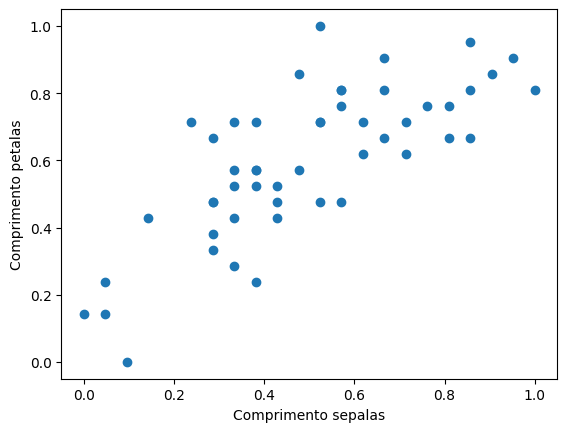

In [4]:
#Scatterplot dos dados de entrada x dados de saída

plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

## Modelo da rede

### Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/linhareta.png)

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde
* $w_1$ é o coeficiente angular da reta e
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

### Linear Regression Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

### Formulação matricial do neurônio

* $\mathbf{w} = [w_0 \ w_1]$ é vetor linha de parâmetros e
* $\mathbf{x} = [1 \ x_0] $ é vetor linha de uma amostra (com *bias*).

$$ \hat{y} = 1 w_0 + x_0 w_1 $$

$$ [\hat{y}] = [1 \ x_0] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ \mathbf{\hat{y}} = \mathbf{x} \mathbf{w^T} $$

### Fazendo o predict de várias amostras

$$ \begin{matrix}
\begin{bmatrix}
\hat{y}_0\\
\hat{y}_1\\
\\
\hat{y}_{M-1}
\end{bmatrix} &=& \begin{bmatrix}
1 & x_0 \\
1 & x_1\\
\\
1 & x_{M-1} \\
\end{bmatrix}
&
\begin{bmatrix}
w_0\\
w_1
\end{bmatrix} \\
(M,1) & & (M,2) & (2,1) \\
\end{matrix} $$

### Preenchendo x com coluna de 1's para bias

In [5]:
x_train

array([[1.        ],
       [0.71428571],
       [0.95238095],
       [0.28571429],
       [0.76190476],
       [0.38095238],
       [0.66666667],
       [0.        ],
       [0.80952381],
       [0.14285714],
       [0.04761905],
       [0.47619048],
       [0.52380952],
       [0.57142857],
       [0.33333333],
       [0.85714286],
       [0.33333333],
       [0.42857143],
       [0.61904762],
       [0.33333333],
       [0.47619048],
       [0.57142857],
       [0.66666667],
       [0.57142857],
       [0.71428571],
       [0.80952381],
       [0.9047619 ],
       [0.85714286],
       [0.52380952],
       [0.38095238],
       [0.28571429],
       [0.28571429],
       [0.42857143],
       [0.52380952],
       [0.23809524],
       [0.52380952],
       [0.85714286],
       [0.66666667],
       [0.33333333],
       [0.28571429],
       [0.28571429],
       [0.57142857],
       [0.42857143],
       [0.04761905],
       [0.33333333],
       [0.38095238],
       [0.38095238],
       [0.619

In [6]:
np.ones(shape=(n_samples,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])


In [8]:
# X Train com 50 linhas e 2 colunas
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428571],
       [1.        , 0.95238095],
       [1.        , 0.28571429],
       [1.        , 0.76190476],
       [1.        , 0.38095238],
       [1.        , 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.80952381],
       [1.        , 0.14285714],
       [1.        , 0.04761905],
       [1.        , 0.47619048],
       [1.        , 0.52380952],
       [1.        , 0.57142857],
       [1.        , 0.33333333],
       [1.        , 0.85714286],
       [1.        , 0.33333333],
       [1.        , 0.42857143],
       [1.        , 0.61904762],
       [1.        , 0.33333333],
       [1.        , 0.47619048],
       [1.        , 0.57142857],
       [1.        , 0.66666667],
       [1.        , 0.57142857],
       [1.        , 0.71428571],
       [1.        , 0.80952381],
       [1.        , 0.9047619 ],
       [1.        , 0.85714286],
       [1.        , 0.52380952],
       [1.        , 0.38095238],
       [1.

In [9]:
x_train_bias.shape

(50, 2)

### Classe com o modelo da rede

In [10]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros
        #self.w = [0,0]
        #self.w = np.zeros(shape=(n_out,n_in))

    def forward(self, x_bias): #Cálculo do valor predito
        return x_bias.dot(self.w.T) #Multiplicação matricial (y_pred = X x w.T)

### Criando a rede, instanciando o objeto model

In [11]:
model = Net(2,1) # duas entradas (1 ; x0) e uma saída y_pred

In [12]:
model.w #pesos iniciais

array([[-0.06169611,  0.02442175]])

### Testando o predict da rede (mesmo sem treiná-la)

Utilizando 2 entradas X

In [13]:
xin = np.random.randn(4,2)

xin

array([[ 1.43270697, -0.3126519 ],
       [-0.72058873,  0.88716294],
       [ 0.85958841, -0.6365235 ],
       [ 0.01569637, -2.24268495]])

In [14]:
model.w.T #Matriz com os valores de w

array([[-0.06169611],
       [ 0.02442175]])

In [15]:
#ypred = x . wT

ypred = model.forward(xin)
ypred

array([[-0.09602795],
       [ 0.0661236 ],
       [-0.06857828],
       [-0.05573871]])

In [16]:
ypred = model.forward(x_train_bias)
ypred[0:5]

array([[-0.03727436],
       [-0.044252  ],
       [-0.0384373 ],
       [-0.05471847],
       [-0.04308906]])

## Treinamento via gradiente descendente

Função de perda:
$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

Gradiente:
$$  \mathbf{\nabla{J_w}} = \frac{2}{M}\mathbf{x^T}(\mathbf{x w^T} - \mathbf{y}) $$

Atualização dos parâmetros pelo gradiente descendente:
$$ \mathbf{w} = \mathbf{w} − \eta (\mathbf{\nabla J_w})^T $$

### Laço de treinamento

In [17]:
model = Net(2,1) #Criando uma instância da classe Net

In [18]:
num_epochs = 100
learning_rate = 0.5 #Taxa de aprendizado
losses = [] #Lista para armazenar os valores de perdas
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias) #Calculo do y pred - ypred = X . wT

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean() # Cálculo da perda (ypred-y)^2/N


    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    losses.append(loss)

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))


Epoch[1/100], loss: 0.339831
Epoch[2/100], loss: 0.050684
Epoch[3/100], loss: 0.031016
Epoch[4/100], loss: 0.029003
Epoch[5/100], loss: 0.028210
Epoch[6/100], loss: 0.027556
Epoch[7/100], loss: 0.026968
Epoch[8/100], loss: 0.026434
Epoch[9/100], loss: 0.025949
Epoch[10/100], loss: 0.025509
Epoch[11/100], loss: 0.025109
Epoch[12/100], loss: 0.024746
Epoch[13/100], loss: 0.024417
Epoch[14/100], loss: 0.024118
Epoch[15/100], loss: 0.023846
Epoch[16/100], loss: 0.023600
Epoch[17/100], loss: 0.023376
Epoch[18/100], loss: 0.023173
Epoch[19/100], loss: 0.022988
Epoch[20/100], loss: 0.022821
Epoch[21/100], loss: 0.022669
Epoch[22/100], loss: 0.022531
Epoch[23/100], loss: 0.022405
Epoch[24/100], loss: 0.022291
Epoch[25/100], loss: 0.022188
Epoch[26/100], loss: 0.022094
Epoch[27/100], loss: 0.022009
Epoch[28/100], loss: 0.021932
Epoch[29/100], loss: 0.021862
Epoch[30/100], loss: 0.021798
Epoch[31/100], loss: 0.021740
Epoch[32/100], loss: 0.021687
Epoch[33/100], loss: 0.021640
Epoch[34/100], loss

In [19]:
model.w # Valor otimizado de w após 100 épocas

array([[0.26306045, 0.68314988]])

## Avaliação

### Predict

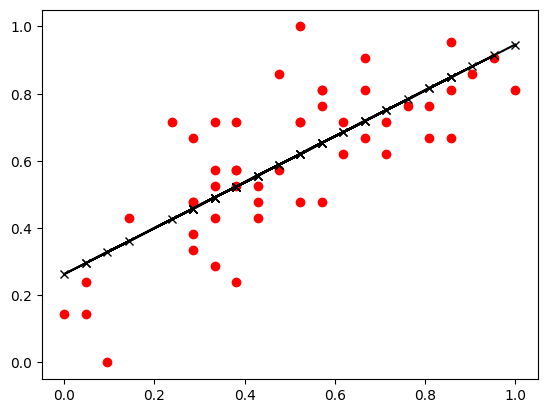

In [20]:
#Avaliação da reta otimizada pelo modelo em relação aos pontos originais

y_pred = model.forward(x_train_bias)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, 'kx-', label='Fitting Line')

### Parâmetros treinados

In [21]:
print(model.w)

[[0.26306045 0.68314988]]


### Avaliação do modelo

In [22]:
#Cálculo da perda após 100 épocas de otimização dos pesos

loss = np.square(y_pred - y_train).mean()
loss

np.float64(0.02117008324736041)

### Valor ótimo, solução analítica



Valor ótimo já conhecido

$$  \mathbf{w} =(\mathbf{x^T} \mathbf{x})^{−1}\mathbf{x^T} \mathbf{y} $$

In [23]:
x = x_train_bias #Formato [1 x]
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
w_opt

array([[0.26134159],
       [0.68646976]])

In [24]:
print(model.w)

[[0.26306045 0.68314988]]


In [25]:
#Perda da solução ótima

loss_opt = np.square(x.dot(w_opt) - y).mean()
loss_opt

np.float64(0.021169424119097165)

# Exercícios

## Questões

1. Quantos parâmetros são treinados nesse modelo?
**2 parâmetros w0 e w1**

2. Qual é o número de atributos de entrada para a rede?
**Contando com o Bias seriam 2 atributos (Bias e X)**

3. Qual é o número de saídas da rede?
**1 Saída - Y**

4. Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada?

**[5000, 2]**

Qual é o shape do matriz de saída?

**[5000, 1]**


## Atividades

1. Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final
   de cada época. Após o treinamento, plote o valor da perda em função da época.
2. Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.
3. Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e
   compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

Epoch[1/100], loss: 0.432375
Epoch[2/100], loss: 0.056651
Epoch[3/100], loss: 0.031341
Epoch[4/100], loss: 0.028966
Epoch[5/100], loss: 0.028154
Epoch[6/100], loss: 0.027505
Epoch[7/100], loss: 0.026921
Epoch[8/100], loss: 0.026391
Epoch[9/100], loss: 0.025910
Epoch[10/100], loss: 0.025474
Epoch[11/100], loss: 0.025077
Epoch[12/100], loss: 0.024717
Epoch[13/100], loss: 0.024391
Epoch[14/100], loss: 0.024094
Epoch[15/100], loss: 0.023825
Epoch[16/100], loss: 0.023580
Epoch[17/100], loss: 0.023358
Epoch[18/100], loss: 0.023157
Epoch[19/100], loss: 0.022974
Epoch[20/100], loss: 0.022807
Epoch[21/100], loss: 0.022657
Epoch[22/100], loss: 0.022520
Epoch[23/100], loss: 0.022395
Epoch[24/100], loss: 0.022282
Epoch[25/100], loss: 0.022180
Epoch[26/100], loss: 0.022087
Epoch[27/100], loss: 0.022002
Epoch[28/100], loss: 0.021926
Epoch[29/100], loss: 0.021856
Epoch[30/100], loss: 0.021793
Epoch[31/100], loss: 0.021735
Epoch[32/100], loss: 0.021683
Epoch[33/100], loss: 0.021636
Epoch[34/100], loss

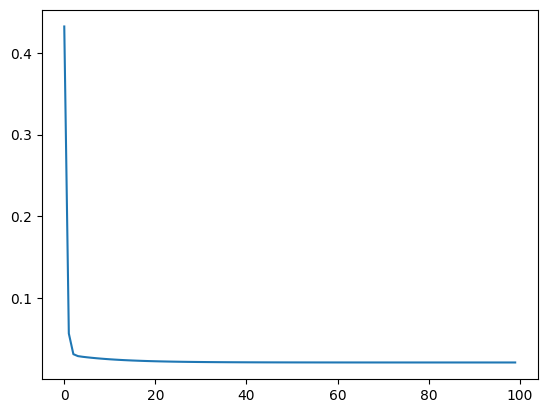

In [26]:
#1

model = Net(2,1) #Criando uma instância da classe Net

num_epochs = 100
learning_rate = 0.5
losses = [] # Crição de lista para armazenar os valores das perdas após cada laço de treinamento
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    losses.append(loss) #Adicionar a perda dessa época de treinamento à lista de perdas

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))
print(losses)
plt.plot(losses)

In [27]:
2.
model = Net(2,1) #Criação de uma nova instância da Rede
print(f' Pesos iniciais: {model.w}')
y_pred = model.forward(x_train_bias)

loss = np.square(y_pred - y_train).mean()
print(f' Perda sem treinamento: {loss}')

 Pesos iniciais: [[ 0.00061663 -0.09724631]]
 Perda sem treinamento: 0.47660782116551287


In [28]:
3.
#Solução gradiente
model = Net(2,1)
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T
print(f"Valores Solução Gradiente:\n w: {model.w} | perda: {loss}")

#Solução ótima
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
model.w = w_opt.T
# forward - predict
y_pred = model.forward(x_train_bias)

#loss cálculo da função de perda
loss = np.square(y_pred - y_train).mean()

print(f"Valores Solução Ótima:\n w: {model.w} | perda: {loss}")

Valores Solução Gradiente:
 w: [[0.26297988 0.68330552]] | perda: 0.021170083637689005
Valores Solução Ótima:
 w: [[0.26134159 0.68646976]] | perda: 0.021169424119097165


# Aprendizados

**Redes Neurais:**: Uma rede neural é um programa, ou modelo, de aprendizado de máquina que toma decisões de uma forma semelhante ao cérebro humano, utilizando processos que imitam a maneira como os neurônios biológicos trabalham juntos para identificar fenômenos, ponderar opções e chegar a conclusões.

Toda rede neural é composta por camadas de nós, ou neurônios artificiais: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó se conecta a outros e possui seu próprio peso e limiar associados

**Gradiente Descendente:**O gradiente descendente é um algoritmo de otimização comumente usado para treinar modelos de aprendizado de máquina e redes neurais. Ele treina modelos de aprendizado de máquina ao minimizar os erros entre os resultados previstos e os reais.

Os conceitos de Redes Neurais e gradientes descendentes foram utilizados nesse projeto para realizar um algoritmo de regressão linear com base nos dados Iris.


**Etapas do Laço de treinamento:**
- Predição dos valores com base nos dados de entrada (X)

- Cálculo da função perda. MSE foi usada no projeto.
  
  Perda de entropia cruzada / binária poderia ser usada para modelos de classificação.

- Cálculo do gradiente (utilizando a função perda e o learning rate)

- Atualização dos pesos iniciais usando o gradiente calculado

A médida que o treinamento passa pelas épocas, o valor dos pesos e consequentemente d função custo (MSE) se aproximam da solução analítica


**Learning rate:** Taxa de aprendizagem. Parâmetro fundamental para o cálculo o gradiente descendente. Pequenos valores de Learning rate podem levar a um aprendizado mais lenta (mais épocas necessárias), grandes valores podem levar a um treinamento instável com dificuldade para convergir para a melhor solução
